# Combinar Data Frames


#### Existen diferentes formas de fusionar dos DataFrames. Esto se hace a través de la lógica de combinación como se muestra a continuación:

+ Left join: Da prioridad al DataFrame de la izquierda. Trae siempre los datos de la izquierda y las filas en común con el DataFrame de la derecha.

+ Right join: Da prioridad al DataFrame de la derecha. Trae siempre los datos de la derecha y las filas en común con el DataFrame de la izquierda.

+ Inner join: Trae solamente aquellos datos que son común en ambos DataFrame

+ Outer join: Trae los datos tanto del DataFrame de la izquierda como el de la derecha, incluyendo los datos que comparten ambos.

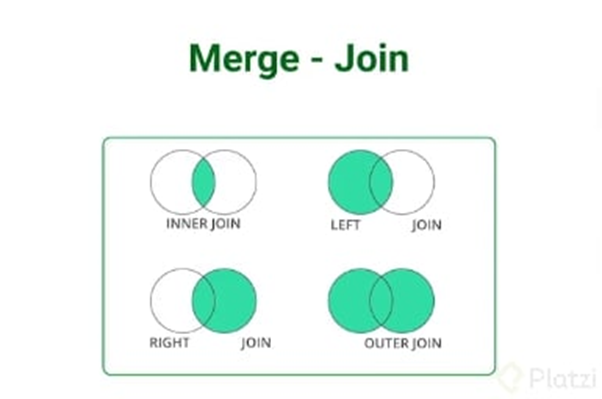


## Otra manera - Concat

+ Concat - Axis 0: permite combinar dos dataframes a nivel de filas. Crecimiento vertical

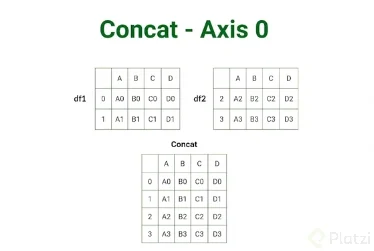
```python
pd.concat([df1,df2],axis="rows")
```

+ Concat - Axis 1: permite combinar dos dataframes a nivel de columnas. 
  La organizacion por columnas no va a ser la misma para ambos dataFrames, por tanto, se crearan valores NaN para rellenar los espacios vacios. Crecimiento horizontal.

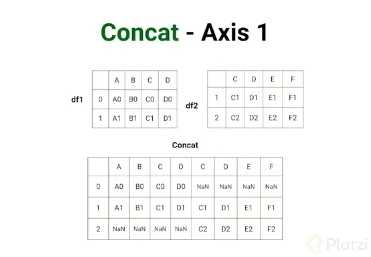
```python
pd.concat([df1,df2],axis="columns")
```


Comparación con SQL
--------------------
Referencia:
https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html


In [14]:
import pandas as pd
import numpy as np

In [15]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
 'B':['B0','B1','B2','B3'],
 'C':['C0','C1','C2','C3'],
 'D':['D0','D1','D2','D3']})

df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
 'B':['B4','B5','B6','B7'],
 'C':['C4','C5','C6','C7'],
 'D':['D4','D5','D6','D7']})

In [16]:
#Procedemos a concatenar
#Ejecutandose por default por axis 0 por las filas
pd.concat([df1,df2])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


### Qué pasa con el indice?
Tenemos 2 indices repetidos, para corregir esto
```python
pd.concat([df1,df2],ignore_index=True)
```


In [17]:
#Solución a indices repetidos
pd.concat([df1,df2],ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [18]:
#Concatenando a nivel de columnas
pd.concat([df1,df2],axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


In [19]:
pd.concat([df1,df2],axis='columns')

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


## Merge

In [20]:
df_iz = pd.DataFrame({'key':['k0','k1','k2','k3'],
 'A':['A0','A1','A2','A3'],
 'B':['B0','B1','B2','B3']})

df_de = pd.DataFrame({'key':['k0','k1','k2','k3'],
 'C':['C0','C1','C2','C3'],
 'D':['D0','D1','D2','D3']})

In [21]:
df_iz

,key,A,B
0,k0,A0,B0
1,k1,A1,B1
2,k2,A2,B2
3,k3,A3,B3


In [22]:
df_de

,key,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,k3,C3,D3


## Recordatorio

``` python
dataframe_iz.merge(dataframe_der)
```
Siempre: 
* dataframe_iz: Es el dataframe de la izquierda
* dataframe_der: Es el dataframe de la derechar
  
  >dataframe_der *Siempre va adentro del parentesis* 

In [23]:
#USANDO MERGE

#Hace merge de todo
df_iz.merge(df_de)

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [24]:
#Especificando parametros
df_iz.merge(df_de,on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [25]:
#Modificando los dataframes
df_iz = pd.DataFrame({'key':['k0','k1','k2','k3'],
 'A':['A0','A1','A2','A3'],
 'B':['B0','B1','B2','B3']})

df_de = pd.DataFrame({'key2':['k0','k1','k2','k3'],
 'C':['C0','C1','C2','C3'],
 'D':['D0','D1','D2','D3']})

#Provocando el fallo
df_iz.merge(df_de,on='key')

KeyError: 'key'

## Explicación:
Se provocó debido al intento de merge
```python
df_iz.merge(df_de,on='key')
```
`key`

No se encuentra en el `df_de`, entonces no es común y no se puede aplicar el merge. 

In [ ]:
#para solucionarlo tenemos que hacer lo siguiente
df_iz.merge(df_de,left_on='key',right_on='key2')

#ASÍ ES COMO HAGO MERGE A NIVEL 
#DE DISTINTAS LLAVES

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,k3,C3,D3


In [ ]:
#Modificando los dataframes
df_iz = pd.DataFrame({'key':['k0','k1','k2','k3'],
 'A':['A0','A1','A2','A3'],
 'B':['B0','B1','B2','B3']})

df_de = pd.DataFrame({'key2':['k0','k1','k2',np.nan],
 'C':['C0','C1','C2','C3'],
 'D':['D0','D1','D2','D3']})

#Uno de los valores de df_de no tiene valor
df_de

,key2,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,NaN,C3,D3


In [ ]:
#Aplicamos el merge
df_iz.merge(df_de,left_on='key',right_on='key2')

#SOLO ME TRAE LAS COINCIDENCIAS EN LAS KEYS
#ENTONCES SOLO HACE INNER_JOIN

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2


#### *Qué pasa si yo quiero cambiarlo?* *Quiero traerlo aunque no tenga valor*

### Con `how='left'`:
Me va a traer el valor de la izquierda y no me va a dejar nada con la intersección de la derecha, porque no exite.

In [ ]:
#Aquí es donde le decimos que hacer
#Me va hacer un left join
#how='lef'
df_iz.merge(df_de,left_on='key',right_on='key2',how='left')

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,k3,A3,B3,NaN,NaN,NaN


### Con `how='inner'`:
Es el valor por default y me va a traer solo los valores que existen.

In [ ]:
#how='inner'
df_iz.merge(df_de,left_on='key',right_on='key2',how='inner')

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2


### Con `how='right'`:
Me va a traer los valores de la derecha aunque no existan, ademas los de la izquierda los va a rellenar con NaN cuando no existen.

In [ ]:
#how='inner'
df_iz.merge(df_de,left_on='key',right_on='key2',how='right')

,key,A,B,key2,C,D
0,k0,A0,B0,k0,C0,D0
1,k1,A1,B1,k1,C1,D1
2,k2,A2,B2,k2,C2,D2
3,NaN,NaN,NaN,NaN,C3,D3


# Join
--------------
Hace un match a nivel de indice 

In [35]:
#Modificando los dataframes
df_iz = pd.DataFrame({'A':['A0','A1','A2'],
 'B':['B0','B1','B2']},
 index=['k0','k1','k2'])


df_de = pd.DataFrame({'C':['C0','C1','C2'],
 'D':['D0','D1','D2']},
 index=['k0','k2','k3'])

In [37]:
#Funciona exactamente igual que merge
df_iz.join(df_de)

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


In [40]:
#Inner merge o inner join a nivel de indice
df_iz.join(df_de,how='inner')

,A,B,C,D
k0,A0,B0,C0,D0
k2,A2,B2,C1,D1


In [42]:
#Join left a nivel de indice
df_iz.join(df_de,how='left')

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1


In [44]:
#Join right a nivel de indice
df_iz.join(df_de,how='right')

,A,B,C,D
k0,A0,B0,C0,D0
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2


In [45]:
#Join outter es el completo
df_iz.join(df_de,how='outer')
#Me trae los valores de los 2,
#y los que no estan los reemplaza con NaN

,A,B,C,D
k0,A0,B0,C0,D0
k1,A1,B1,NaN,NaN
k2,A2,B2,C1,D1
k3,NaN,NaN,C2,D2


## Recursos adicionales:

* Merge:
  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
  
* Concat:
  https://pandas.pydata.org/docs/reference/api/pandas.concat.html

* Joint:
  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html